In [1]:
import numpy as np
import pandas as pd
import os

In [6]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().values.any()

False

In [10]:
import seaborn as sns

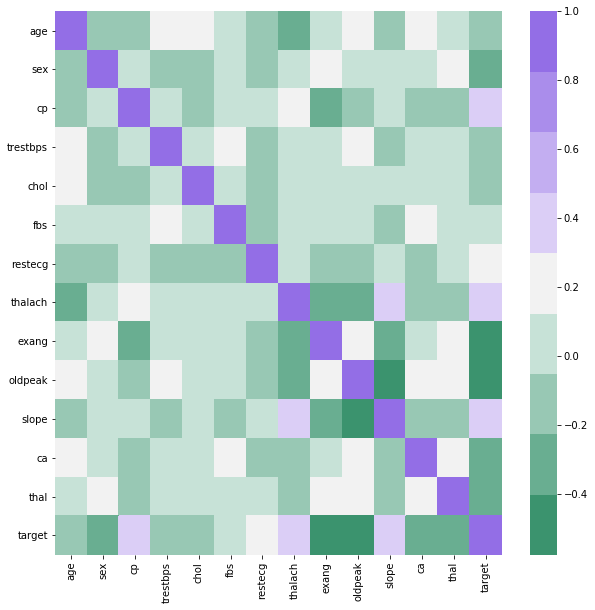

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
_ = data.corr()
sns.heatmap(_, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
X = data.drop(['target'], axis=1)
y = data['target']

In [17]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, test_size=.2)

In [27]:
from sklearn.linear_model import LogisticRegression

for C in [0.01, 0.1, 0.5, 1, 2]:
    clf = LogisticRegression(random_state=0, C = C, solver = 'lbfgs', max_iter = 1000).fit(train_X, train_y)
    ls_preds = clf.predict(val_X)
    acc = roc_auc_score(val_y, ls_preds)
    print('C is:"с", ROC AUC Score is: ', acc)

    
    

C is:"с", ROC AUC Score is:  0.7198924731182795
C is:"с", ROC AUC Score is:  0.7688172043010754
C is:"с", ROC AUC Score is:  0.7365591397849462
C is:"с", ROC AUC Score is:  0.7204301075268817
C is:"с", ROC AUC Score is:  0.7365591397849462


In [18]:
#лучшая модель с показателем с=0.1
clf = LogisticRegression(random_state=0, C = 0.1, solver = 'lbfgs', max_iter = 1000).fit(train_X, train_y)
ls_preds = clf.predict(val_X)
acc = roc_auc_score(val_y, ls_preds)

C is: 0.01 , ROC AUC Score is:  0.7198924731182795
C is: 0.1 , ROC AUC Score is:  0.7688172043010754
C is: 0.5 , ROC AUC Score is:  0.7365591397849462
C is: 1 , ROC AUC Score is:  0.7204301075268817
C is: 2 , ROC AUC Score is:  0.7365591397849462


In [20]:
!pip install eli5

     |████████████████████████████████| 105 kB 796 kB/s eta 0:00:01


#как связаны болезни сердца и содержание холестерина в крови

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())


Weight,Feature
0.0459 ± 0.0482,oldpeak
0.0426 ± 0.0393,ca
0.0393 ± 0.0894,thalach
0.0262 ± 0.0334,thal
0.0230 ± 0.0533,sex
0.0164 ± 0.0293,exang
0.0098 ± 0.0161,trestbps
0.0066 ± 0.0161,slope
0.0066 ± 0.0161,restecg
0 ± 0.0000,fbs


#построенная модель не выявила значимого влияния содержания сахаоа в крови на наличие болезней сердца

#как зависит холестерин от возраста у здоровых людей

In [22]:
data_healthy = data[data.target == 0]
data_healthy


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#выявили здоровых людей среди всего датасета

          age     chol
age   1.00000  0.11261
chol  0.11261  1.00000


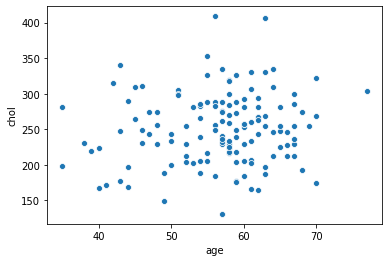

In [24]:
data_healthy = data[data.target == 0][['age', 'chol']]
print(data_healthy.corr())
sns.scatterplot(x="age", y="chol", data=data_healthy)



#небольшая положительная корреляция между волзрастом людей и содержанием холестирина в крови